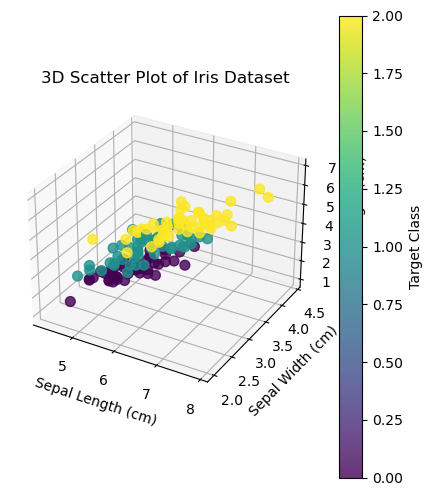

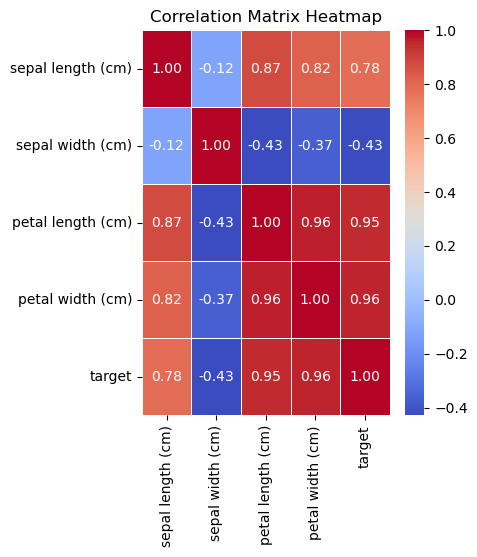

In [43]:
#TASK : 1

# During the data visualization phase, we constructed paired scatter plots among different
# attributes of the iris dataset. Construct a single three dimensional scatter plot among any
# three attributes of the iris dataset. Also construct a Correlation Matrix heatmap among the
# four attributes. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
iris_dataset = load_iris()

iris_df = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],
                       columns=iris_dataset['feature_names'] + ['target'])

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], iris_df['petal length (cm)'],
                     c=iris_df['target'], cmap='viridis', s=50, alpha=0.8)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Iris Dataset')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Class')

plt.show()
correlation_matrix = iris_df.corr()

plt.figure(figsize=(4, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [44]:
#TASK 2:

# Explore at least 2 more classification datasets present within scikit-learn. Implement the
# explored KNN classification mechanism, along with the data visualization techniques
# discussed on the 2 datasets of your choice.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def plot_decision_boundary(X, y, classifier, title, figsize=(4, 5)):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

def knn_classification(X, y, dataset_name):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=1)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on {dataset_name}: {accuracy:.2f}')

    plot_decision_boundary(X_train, y_train, knn, f'Decision Boundary - {dataset_name}')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
iris = load_iris()
diabetes = load_diabetes()


Accuracy on Iris Dataset: 0.73


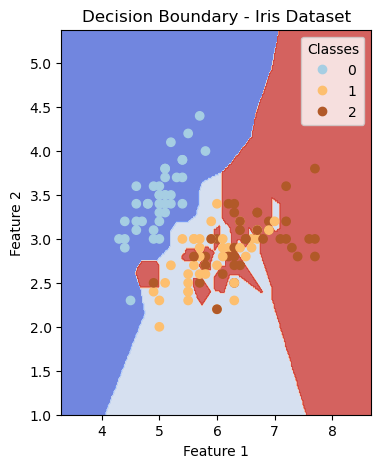

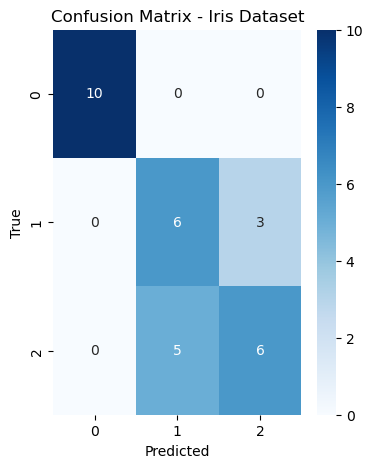

In [45]:
knn_classification(iris.data[:, :2], iris.target, 'Iris Dataset')


Accuracy on Diabetes Dataset: 0.01


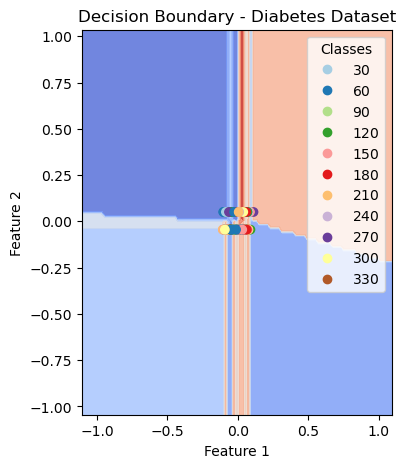

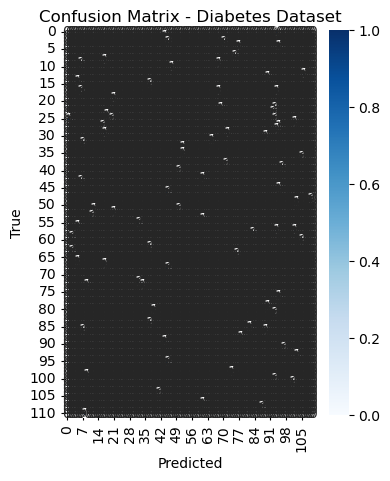

In [46]:
knn_classification(diabetes.data[:, :2], diabetes.target, 'Diabetes Dataset')


In [47]:
#TASK 3:

# Among the popular data sharing formats Excel file (xlsx), Comma Separated Values (CSV),
# and data file (.data) are three popular formats. You are provided with one dataset for each
# of these formats. Find a way to upload these datasets and get them into scikit-learn for
# exploration. Next perform some basic data visualization and try to fit in a KNN model for
# each of these classification problems. Evaluate your model’s performance through the 80/20
# training testing split.
# (Note: you might have to use other libraries introduced at the start of the lab apart from
# scikit-learn). 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_excel('weatherTemp.xlsx')

X_weather = weather_data.drop('play', axis=1) 
y_weather = weather_data['play']

X_weather_encoded = pd.get_dummies(X_weather, columns=['weather', 'temperature'])

p_data = pd.read_csv('PlayTennis.csv')

non_numeric_columns_p = p_data.select_dtypes(include=['object']).columns

label_encoder_p = LabelEncoder()
for column in non_numeric_columns_p:
    p_data[column] = label_encoder_p.fit_transform(p_data[column])

X_p = p_data.drop('Play Tennis', axis=1) 
y_p = p_data['Play Tennis']

dermatology_data = pd.read_csv('dermatology.data', header=None)

X_dermatology = dermatology_data.iloc[:, :-1]
y_dermatology = dermatology_data.iloc[:, -1]

label_encoder_dermatology = LabelEncoder()
for column in range(X_dermatology.shape[1]):
    X_dermatology[column] = label_encoder_dermatology.fit_transform(X_dermatology[column])

def knn_classification(X, y, dataset_name):
    X = X.to_numpy()
    y = y.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=3)  

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
   
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on {dataset_name}: {accuracy:.2f}')

    result1 = classification_report(y_test, y_pred)
    print(f'Classification Report on {dataset_name}:\n{result1}')


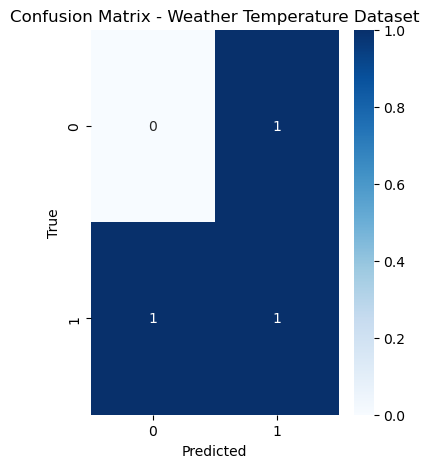

Accuracy on Weather Temperature Dataset: 0.33
Classification Report on Weather Temperature Dataset:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         1
         yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [48]:
knn_classification(X_weather_encoded, y_weather, 'Weather Temperature Dataset')


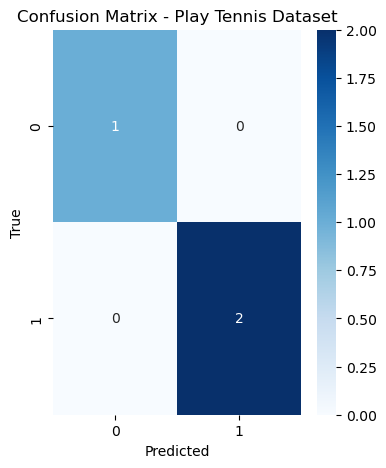

Accuracy on Play Tennis Dataset: 1.00
Classification Report on Play Tennis Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [49]:
knn_classification(X_p, y_p, 'Play Tennis Dataset')


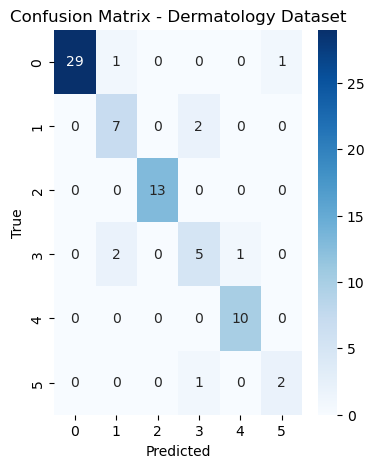

Accuracy on Dermatology Dataset: 0.89
Classification Report on Dermatology Dataset:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.70      0.78      0.74         9
           3       1.00      1.00      1.00        13
           4       0.62      0.62      0.62         8
           5       0.91      1.00      0.95        10
           6       0.67      0.67      0.67         3

    accuracy                           0.89        74
   macro avg       0.82      0.83      0.82        74
weighted avg       0.90      0.89      0.89        74



In [50]:
knn_classification(X_dermatology, y_dermatology, 'Dermatology Dataset')


In [51]:
#TASK 4:

# Identify at least 3 famous data repositories where datasets for different machine learning
# exercises are available. Pick any one classification dataset from among these repositories and
# fit in a KNN classifier on your dataset. Report the accuracy of the model for different values
# of N (Neighbors).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

di_data = pd.read_csv('diabetes.csv')

di_data = di_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                             'DiabetesPedigreeFunction','Age','Outcome']]

X = di_data.drop('Outcome', axis=1)
y = di_data['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for N={n_neighbors}: {accuracy:.4f}')


Accuracy for N=1: 0.6169
Accuracy for N=2: 0.6558
Accuracy for N=3: 0.7013
Accuracy for N=4: 0.6948
Accuracy for N=5: 0.6883
Accuracy for N=6: 0.7013
Accuracy for N=7: 0.6818
Accuracy for N=8: 0.6883
Accuracy for N=9: 0.6818
Accuracy for N=10: 0.6818
